In [4]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_wind.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime 

In [5]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_wind.csv')

In [6]:
wind = wind.set_index('datetime')

In [7]:
wind.head()

,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,area,wind_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,,,,,,,
07/01/20 00:00,49701,BELLSMIL,34 KV,LD1B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49702,BELLSMIL,34 KV,LD2B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49703,BELLSMIL,34 KV,LD3B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49704,BELLSMIL,34 KV,LD4B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49705,BELLSMIL,69 KV,69-1,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,85.433,Wind,536.1,0.01,True


In [11]:
len(wind)
solar.voltage.unique()

array(['34 KV', '69 KV', '230 KV', '13 KV', '4 KV', '20 KV', '24 KV',
       '23 KV', '500 KV', '138 KV', '13.8 KV', '18 KV', '19 KV',
       '34.5 KV'], dtype=object)

In [8]:
solar = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_solar.csv')

In [9]:
solar = solar.set_index('datetime')

In [10]:
len(solar)

467208

## Need to think about

- what to do with voltage
    - rename to 'voltage (kv) and values switched to floats
    

In [12]:
solar['voltage'] = solar['voltage'].str.replace(r'[^0-9]+', '')

In [13]:
solar.astype({'voltage': 'float64'}).dtypes

pnode_id                      int64
pnode_name                   object
voltage                     float64
equipment                    object
type                         object
zone                         object
system_energy_price_rt      float64
total_lmp_rt                float64
congestion_price_rt         float64
marginal_loss_price_rt      float64
row_is_current                 bool
version_nbr                   int64
area                         object
solar_generation_mw         float64
fuel_type                    object
mw                          float64
fuel_percentage_of_total    float64
is_renewable                   bool
dtype: object

In [14]:
solar = solar.rename(columns={"voltage":'voltage_kv'})

In [15]:
solar.head(45)
# Wayne: I believe that columns like 'solar_generation_mw' & 'mw' will be the same 
#for any instance of a datetime signature 
#is there a better way to handle these, perhaps a separate df
#please let me know your thoughts on this 

,pnode_id,pnode_name,voltage_kv,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,area,solar_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,,,,,,,
07/01/20 00:00,49701,BELLSMIL,34,LD1B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49702,BELLSMIL,34,LD2B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49703,BELLSMIL,34,LD3B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49704,BELLSMIL,34,LD4B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49705,BELLSMIL,69,69-1,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49706,BELLSMIL,69,69-2,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49707,BELLSMIL,69,69-3,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49708,BELLSMIL,69,69-4,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49710,BENNING,69,LOAD46,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True


In [19]:
solar.zone.value_counts()
solar.drop(['zone'], axis=1)
wind.drop(['zone'], axis=1)

,pnode_id,pnode_name,voltage,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,area,wind_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,,,,,,
07/01/20 00:00,49701,BELLSMIL,34 KV,LD1B,LOAD,15.65,15.78,0.00,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49702,BELLSMIL,34 KV,LD2B,LOAD,15.65,15.78,0.00,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49703,BELLSMIL,34 KV,LD3B,LOAD,15.65,15.78,0.00,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49704,BELLSMIL,34 KV,LD4B,LOAD,15.65,15.78,0.00,0.12,True,1,MIDATL,85.433,Wind,536.1,0.01,True
07/01/20 00:00,49705,BELLSMIL,69 KV,69-1,LOAD,15.65,15.76,0.00,0.10,True,1,MIDATL,85.433,Wind,536.1,0.01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/30/20 00:00,2156109755,HAWKINSM,34.5 KV,MILGRVSP,GEN,11.75,11.74,-0.04,0.02,True,1,MIDATL,183.780,Wind,3218.6,0.04,True
09/30/20 00:00,2156110433,BENNING,69 KV,15T,LOAD,11.75,11.86,-0.04,0.15,True,1,MIDATL,183.780,Wind,3218.6,0.04,True
09/30/20 00:00,2156110434,RITCHIE,69 KV,LD69006,LOAD,11.75,11.82,-0.04,0.11,True,1,MIDATL,183.780,Wind,3218.6,0.04,True


In [ ]:
wind['voltage'] = wind['voltage'].str.replace(r'[^0-9]+', '')
wind.astype({'voltage': 'float64'}).dtypes
wind = wind.rename(columns={"voltage":'voltage_kv'})
wind.drop(['zone'], axis=1)

solar['voltage'] = solar['voltage'].str.replace(r'[^0-9]+', '')
solar.astype({'voltage': 'float64'}).dtypes
solar = solar.rename(columns={"voltage":'voltage_kv'})
solar.drop(['zone'], axis=1)

## Exploring the Data

In [23]:
solar.head()

,pnode_id,pnode_name,voltage_kv,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,area,solar_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable
datetime,,,,,,,,,,,,,,,,,,
07/01/20 00:00,49701,BELLSMIL,34,LD1B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49702,BELLSMIL,34,LD2B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49703,BELLSMIL,34,LD3B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49704,BELLSMIL,34,LD4B,LOAD,PEPCO,15.65,15.78,0.0,0.12,True,1,MIDATL,-1.153,Solar,21.9,0.0,True
07/01/20 00:00,49705,BELLSMIL,69,69-1,LOAD,PEPCO,15.65,15.76,0.0,0.10,True,1,MIDATL,-1.153,Solar,21.9,0.0,True


In [17]:
solar['voltage_kv'].value_counts(normalize=True) * 100

69     39.351852
13     20.370370
138    19.444444
34      7.407407
18      4.166667
230     2.777778
500     1.851852
20      0.925926
4       0.925926
24      0.925926
23      0.925926
19      0.462963
345     0.462963
Name: voltage_kv, dtype: float64

In [18]:
wind['voltage_kv'].value_counts(normalize=True) * 100

69     39.351852
13     20.370370
138    19.444444
34      7.407407
18      4.166667
230     2.777778
500     1.851852
20      0.925926
4       0.925926
24      0.925926
23      0.925926
19      0.462963
345     0.462963
Name: voltage_kv, dtype: float64

In [19]:
wind['equipment'].value_counts(normalize=True) * 100
#Wayne: i figure i'm not getting an innacurate percentage becuase in theory each 
#piece of eqipment 

LOAD T2    3.773585
LOAD T4    3.773585
LOAD T1    3.773585
LOAD T3    3.773585
LD2        3.301887
             ...   
STEAM      0.471698
LD69002    0.471698
STADG1     0.471698
6724       0.471698
6779       0.471698
Name: equipment, Length: 138, dtype: float64

In [20]:
solar['equipment'].value_counts(normalize=True) * 100


LOAD T2    3.773585
LOAD T4    3.773585
LOAD T1    3.773585
LOAD T3    3.773585
LD2        3.301887
             ...   
STEAM      0.471698
LD69002    0.471698
STADG1     0.471698
6724       0.471698
6779       0.471698
Name: equipment, Length: 138, dtype: float64

In [33]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import random 

In [22]:
solar_std = solar[['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']] #need double brackets bc otherwise python reads as one column, need list of columns
solar_columns = ['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']

In [28]:

solar_std = solar_std.apply(pd.to_numeric)

In [37]:
solar_std['total_lmp_rt'].std(ddof=0)

17.976688410698962

In [39]:
solar.groupby('voltage_kv')['total_lmp_rt'].std(ddof=0)

voltage_kv
13     18.429624
138    17.056026
18     17.238511
19     15.657216
20     23.550356
23     19.462245
230    18.660552
24     23.557447
34     17.069822
345    18.808535
4      19.781775
500    15.578337
69     18.110163
Name: total_lmp_rt, dtype: float64

In [42]:
solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0)

voltage_kv
13     0.419866
138    0.448208
18     0.360278
19     0.336661
20     0.331739
23     0.445067
230    0.401535
24     0.331112
34     0.449709
345    0.364353
4      0.295017
500    0.287343
69     0.385254
Name: marginal_loss_price_rt, dtype: float64

In [29]:
solar_std.dtypes

system_energy_price_rt      float64
total_lmp_rt                float64
congestion_price_rt         float64
marginal_loss_price_rt      float64
solar_generation_mw         float64
mw                          float64
fuel_percentage_of_total    float64
dtype: object

In [25]:
marg_loss = solar['marginal_loss_price_rt']

In [29]:
solar['marginal_loss_price_rt'].describe() 

count    467208.000000
mean          0.165758
std           0.437304
min          -3.810000
25%          -0.050000
50%           0.130000
75%           0.330000
max           4.590000
Name: marginal_loss_price_rt, dtype: float64

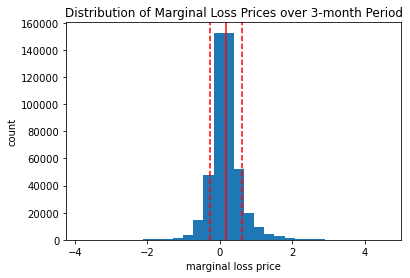

In [30]:
_ = plt.hist(marg_loss, bins=30)
_ = plt.xlabel('marginal loss price')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Marginal Loss Prices over 3-month Period')
_ = plt.axvline(0.165758, color='r')
_ = plt.axvline(0.165758+ 0.437304, color='r', linestyle='--')
_ = plt.axvline(0.165758- 0.437304, color='r', linestyle='--')


The marginal loss price for the Pepco energy grid is normally distributed. There appears to be minimal outliers, but is ever so slighlty skewed left. 

In [34]:
def marg_loss_sampler(n):
    return np.random.choice(marg_loss, n)


In [36]:
fifty_samples = marg_loss_sampler(50)
fifty_samples.mean()

0.10619999999999999

In [37]:
five100_samples = marg_loss_sampler(500)
five100_samples.mean()

0.17902

In [39]:
five1000 = marg_loss_sampler(5000)
five1000.mean()

0.15194000000000002

In [40]:
marg_loss_mean = np.mean(marg_loss)
marg_loss_std = np.std(marg_loss, ddof=0)
ppf = norm.ppf([0.975, 0.025], loc=marg_loss_mean, scale=marg_loss_std)
print(ppf)

[ 1.02285679 -0.69134081]


The point percentage function in conjunction with the above histogram shows that the marinal loss price is heavily cenetred around it's mean. 


1510.3297734620546
1216.3855141028212


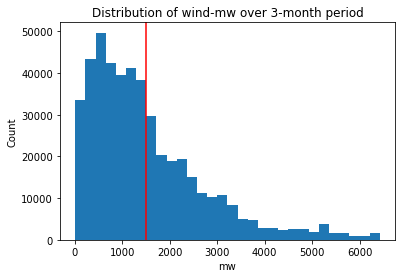

In [44]:
w_mean = np.mean(wind.mw)
w_std = np.std(wind.mw, ddof=0)
print(w_mean)
print(w_std)


_ = plt.hist(wind['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of wind-mw over 3-month period')
_ = plt.axvline(w_mean, color='r')

471.83388811925397
563.8557892168087


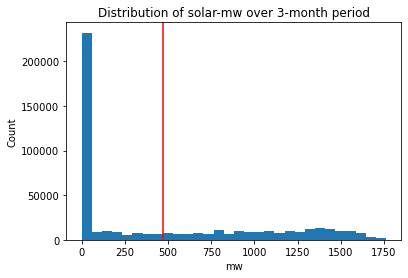

In [46]:
s_mean = np.mean(solar.mw)
s_std = np.std(solar.mw, ddof=0)
print(s_mean)
print(s_std)


_ = plt.hist(solar['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of solar-mw over 3-month period')
_ = plt.axvline(s_mean, color='r')

In [47]:
solar_mw = solar['mw']
solar_mw.describe()

count    467208.000000
mean        471.833888
std         563.856393
min           0.000000
25%          10.600000
50%          66.000000
75%         979.000000
max        1761.100000
Name: mw, dtype: float64

Wind clearly has more variability in how much mw is produced/availableover th three month period. Wonder how this stark discrepancy infuences lmps?

In [49]:
print(sum(solar['mw'].value_counts()))
print(solar['mw'].value_counts())

467208
7.9       41256
7.6       14040
10.2      12312
0.0       11232
17.3       7128
          ...  
1247.9      216
154.2       216
458.8       216
620.3       216
64.0        216
Name: mw, Length: 1215, dtype: int64


In [51]:
solar_mw.head()

datetime
07/01/20 00:00    21.9
07/01/20 00:00    21.9
07/01/20 00:00    21.9
07/01/20 00:00    21.9
07/01/20 00:00    21.9
Name: mw, dtype: float64

In [55]:
solar.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,3.729405e-18,-1.650763e-17,9.525335e-17,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,3.647415e-01,3.985117e-01,2.980978e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,3.087442e-01,3.340170e-01,2.638913e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,6.315318e-02,6.253249e-02,7.245064e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,7.126924e-02,9.331164e-02,4.487364e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,-6.672614e-03,1.946622e-02,1.345957e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,6.672614e-03,-1.946622e-02,-1.345957e-02,NaN
solar_generation_mw,3.729405e-18,3.647415e-01,0.308744,0.063153,0.071269,-6.672614e-03,6.672614e-03,1.000000e+00,9.694056e-01,8.889572e-01,NaN
mw,-1.650763e-17,3.985117e-01,0.334017,0.062532,0.093312,1.946622e-02,-1.946622e-02,9.694056e-01,1.000000e+00,9.113926e-01,NaN
fuel_percentage_of_total,9.525335e-17,2.980978e-01,0.263891,0.072451,0.044874,1.345957e-02,-1.345957e-02,8.889572e-01,9.113926e-01,1.000000e+00,NaN


In [56]:
wind.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,wind_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,-7.048910e-19,-2.132014e-18,3.672529e-18,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,-1.423463e-01,-1.957856e-01,-2.973055e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,-1.253684e-01,-1.630409e-01,-2.437623e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,-3.248622e-02,-3.108638e-02,-3.801099e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,-4.441509e-02,6.422924e-03,-4.877456e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,1.492743e-03,3.239424e-02,4.574003e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,-1.492743e-03,-3.239424e-02,-4.574003e-02,NaN
wind_generation_mw,-7.048910e-19,-1.423463e-01,-0.125368,-0.032486,-0.044415,1.492743e-03,-1.492743e-03,1.000000e+00,4.195998e-01,3.822935e-01,NaN
mw,-2.132014e-18,-1.957856e-01,-0.163041,-0.031086,0.006423,3.239424e-02,-3.239424e-02,4.195998e-01,1.000000e+00,9.408888e-01,NaN
fuel_percentage_of_total,3.672529e-18,-2.973055e-01,-0.243762,-0.038011,-0.048775,4.574003e-02,-4.574003e-02,3.822935e-01,9.408888e-01,1.000000e+00,NaN


<AxesSubplot:>

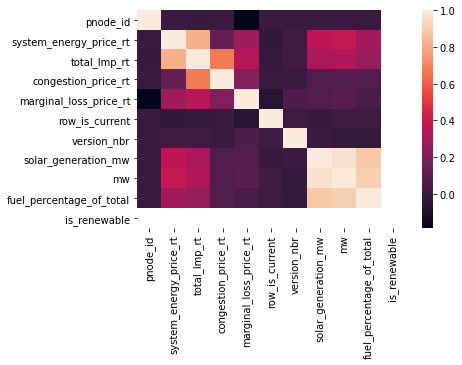

In [58]:
sns.heatmap(solar.corr())

<AxesSubplot:>

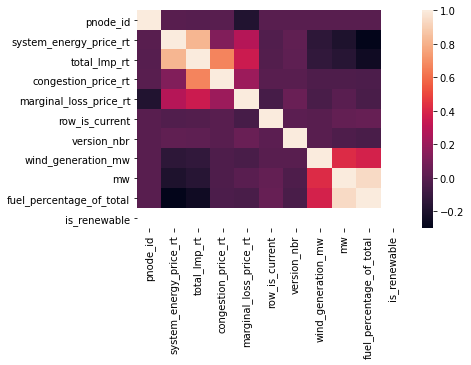

In [59]:
sns.heatmap(wind.corr())

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='voltage_kv', ylabel='marginal_loss_price_rt'>

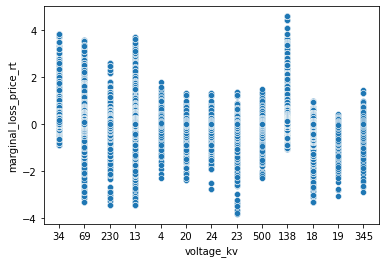

In [63]:
sns.scatterplot(solar['voltage_kv'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel_percentage_of_total', ylabel='marginal_loss_price_rt'>

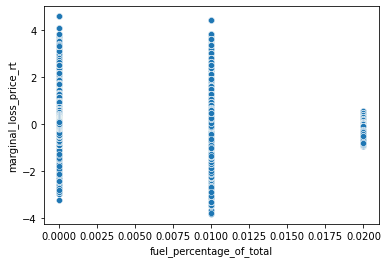

In [65]:
sns.scatterplot(solar['fuel_percentage_of_total'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mw', ylabel='marginal_loss_price_rt'>

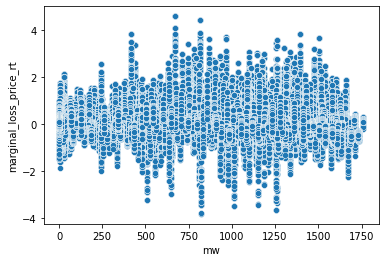

In [66]:
sns.scatterplot(solar['mw'], solar['marginal_loss_price_rt'], data=solar)